In [1]:
import json
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
plt.style.use('ggplot')

## Sentiment

In [2]:
import nltk

In [3]:
# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [4]:
characters_of_interest = ['SPOCK', 'KIRK', 'MCCOY']

# Create dictionaries to store sentiment scores for each character and episode
sentiment_scores = {char: {'episode': [], 'overall': []} for char in characters_of_interest}


In [5]:
%store -r series_lines_by_character_df


In [6]:
three_char = series_lines_by_character_df[characters_of_interest]
filtered_episodes = three_char.dropna(how='all')
filtered_episodes

,SPOCK,KIRK,MCCOY
0,"[Check the circuit., It can't be the screen th...",NaN,NaN
1,"[Miss Uhura, your last sub-space log contained...","[Shall we pick some flowers, Doctor? When a ma...","[Is that how you get girls to like you, by bri..."
2,[That is a very intriguing question. Scanners ...,"[All right, Chief, begin materialisation.\r Ca...",[Tell me. The ship's supply of food\r concentr...
3,"[Your move, Captain., I'll have you checkmated...",[We should have intercepted by now. The Bridge...,NaN
4,"[Check out the life-support systems., Someone ...","[Kirk, affirmative., What caused it?, Captain ...","[You're fine, Joe. Up and out of there.\r Mist..."
...,...,...,...
75,"[It is definitely the stolen space cruiser, Ca...","[Hailing frequencies. Aurora, this is the USS ...",[Trouble. Your friend here didn't want a check...
76,"[It is, Captain., They've already been provide...","[At Federation orders, we're\r proceeding at t...","[That may not be easy, Jim. Medical analysis i..."
77,[I still read a suggestion of carbon cycle lif...,"[Spock, any answers?, Which is scientifically ...",[What's all this poppycock about life forms on...
78,[The power source we detected is in this build...,"[Any sign of survivors?, If they knew that the...",[How can a planet full of people just disappea...


In [7]:
from nltk.tokenize import word_tokenize


In [8]:
word_counts = {char: {'episode': []} for char in characters_of_interest}


In [9]:
# Iterate through the characters of interest
for char in characters_of_interest:
    # Extract the lines spoken by the character and store them in a Series
    character_lines = filtered_episodes[char].fillna("").astype(str)  # Ensure lines are treated as strings
    
    # Perform sentiment analysis on the character's lines
    sentiment_scores[char]['episode'] = character_lines.apply(lambda x: sia.polarity_scores(x)['compound'])
    
    # Tokenize the character's lines and calculate the number of words
    word_counts[char]['episode'] = character_lines.apply(lambda x: len(word_tokenize(x)))

# Convert sentiment_scores to a DataFrame for easy analysis and visualization
sentiment_df = pd.DataFrame(sentiment_scores)

# Display the sentiment analysis results
# print(sentiment_df)

In [10]:
spock_scores = pd.DataFrame(sentiment_scores['SPOCK']['episode'], columns=['SPOCK'])
kirk_scores = pd.DataFrame(sentiment_scores['KIRK']['episode'], columns=['KIRK'])
mccoy_scores = pd.DataFrame(sentiment_scores['MCCOY']['episode'], columns=['MCCOY'])

# Concatenate the DataFrames along the columns axis
merged_df = pd.concat([spock_scores, kirk_scores, mccoy_scores], axis=1)
merged_df

,SPOCK,KIRK,MCCOY
0,-0.6641,0.0000,0.0000
1,-0.9900,0.9957,0.7874
2,-0.9457,0.9965,0.9415
3,-0.8881,0.9917,0.0000
4,0.9743,0.9606,-0.4213
...,...,...,...
75,-0.9693,0.9934,0.7456
76,-0.9787,0.9939,0.3504
77,0.9643,0.9758,0.8351
78,-0.8361,0.7055,-0.9790


In [11]:
spock_words = pd.DataFrame(word_counts['SPOCK']['episode'], columns=['SPOCK'])
kirk_words = pd.DataFrame(word_counts['KIRK']['episode'], columns=['KIRK'])
mccoy_words = pd.DataFrame(word_counts['MCCOY']['episode'], columns=['MCCOY'])

# Concatenate the DataFrames along the columns axis
word_counts_df = pd.concat([spock_words, kirk_words, mccoy_words], axis=1)
word_counts_df

,SPOCK,KIRK,MCCOY
0,488,0,0
1,679,1827,1217
2,533,2093,413
3,863,1695,0
4,1291,1454,540
...,...,...,...
75,956,1476,419
76,1195,2106,280
77,866,1750,462
78,1567,1358,931


In [12]:
average_scores = merged_df.mean()

# Print the average scores
print(average_scores)

SPOCK   -0.005304
KIRK     0.224218
MCCOY    0.104833
dtype: float64


In [13]:
average_words = word_counts_df.mean()

# Print the average scores
print(average_words)

SPOCK    1040.4000
KIRK     1873.2875
MCCOY     573.1125
dtype: float64


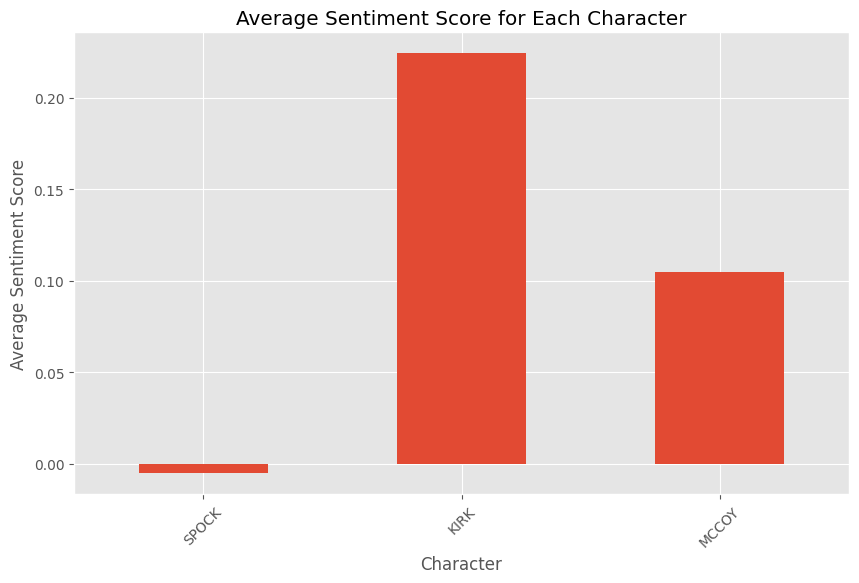

In [14]:
plt.figure(figsize=(10, 6))
average_scores.plot(kind='bar')
plt.xlabel('Character')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score for Each Character')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Trying weighted by words.

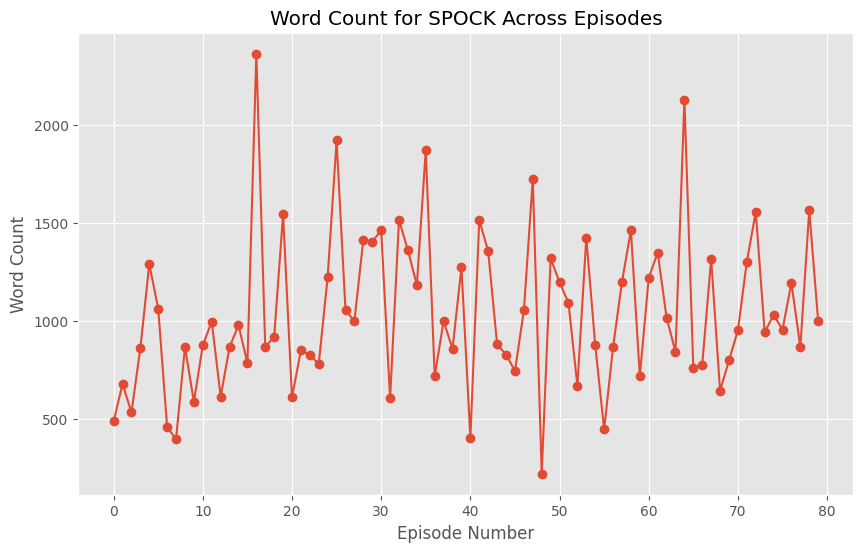

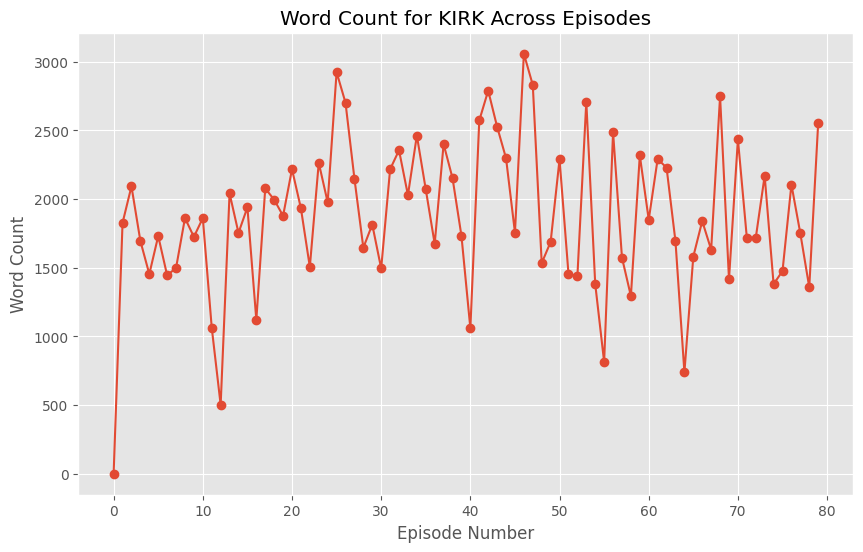

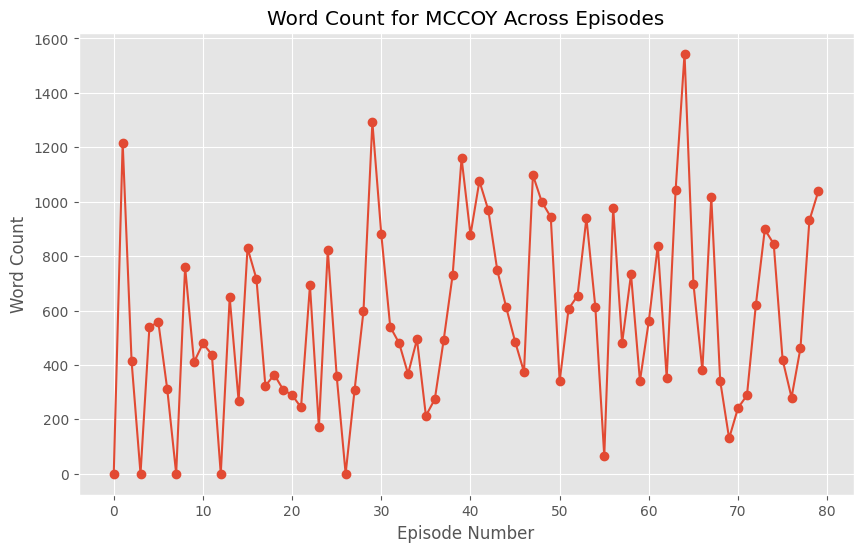

In [15]:
for char in characters_of_interest:
    plt.figure(figsize=(10, 6))
    episode_numbers = range(len(word_counts_df))
    plt.plot(episode_numbers, word_counts_df[char], marker='o', label=char)
    plt.title(f'Word Count for {char} Across Episodes')
    plt.xlabel('Episode Number')
    plt.ylabel('Word Count')
    #plt.legend()
    plt.grid(True)
    plt.show()

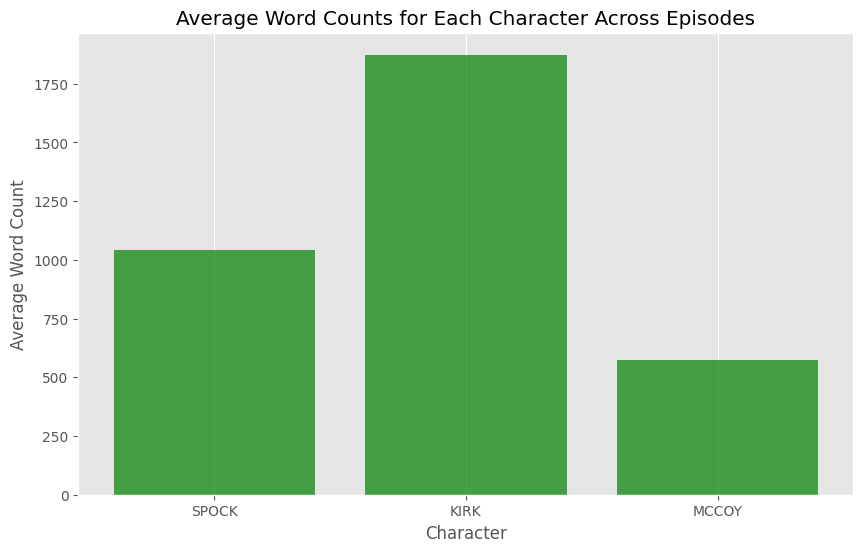

In [16]:
# Calculate and compare the average word counts for each character
average_word_counts = {char: sum(word_counts[char]['episode']) / len(word_counts[char]['episode']) for char in characters_of_interest}

plt.figure(figsize=(10, 6))
plt.bar(average_word_counts.keys(), average_word_counts.values(), color='green', alpha=0.7)
plt.title('Average Word Counts for Each Character Across Episodes')
plt.xlabel('Character')
plt.ylabel('Average Word Count')
plt.grid(axis='y')
plt.show()

In [17]:
# import plotly.graph_objs as go

# # Initialize a list to store Plotly traces
# traces = []

# for char in characters_of_interest:
#     # Merge sentiment scores and word counts per character per episode
#     # scores = pd.DataFrame(sentiment_scores[char])
#     counts = pd.DataFrame(word_counts[char]) 
#     char_data = pd.merge(merged_df[char], counts, left_index=True, right_index=True)
#     char_data.columns = ['sent_per_episode', 'word count']
    
#     # Calculate weighted sentiment score per episode
#     weighted_sentiment_per_episode[char] = char_data['sent_per_episode'] / char_data['word count']

#     # Create a Plotly trace for the character
#     trace = go.Scatter(
#         x=char_data.index,  # Episode numbers
#         y=weighted_sentiment_per_episode[char],
#         mode='lines+markers',
#         name=char
#     )
#     traces.append(trace)

# # Create the layout for the plot
# layout = go.Layout(
#     title='Weighted Sentiment Score Per Episode for Each Character',
#     xaxis=dict(title='Episode'),
#     yaxis=dict(title='Weighted Sentiment Score')
# )

# # Create the Plotly figure
# fig = go.Figure(data=traces, layout=layout)

# # Show the plot
# fig.show()


Maybe weighting by sentiment is not a good thing because low word counts can amplify sentiment scores.

I want to try and show the episode names when I hover above.

In [18]:
%store -r series_lines_raw_df

In [19]:
series_lines_raw_df.head()

,TOS
episode 0,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...
episode 1,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...
episode 2,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...
episode 3,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...
episode 4,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...


In [20]:
pattern = r'-\s(.*?)\n'

# Apply the pattern to extract the title and create a new column
series_lines_raw_df['Title'] = series_lines_raw_df['TOS'].str.extract(pattern)


series_lines_raw_df.head()

,TOS,Title
episode 0,\n\n\n\n\n\nThe Star Trek Transcripts - The Ca...,The Cage
episode 1,\n\n\n\n\n\nThe Star Trek Transcripts - The Ma...,The Man Trap
episode 2,\n\n\n\n\n\nThe Star Trek Transcripts - Charli...,Charlie X
episode 3,\n\n\n\n\n\nThe Star Trek Transcripts - Where ...,Where No Man Has Gone Before
episode 4,\n\n\n\n\n\nThe Star Trek Transcripts - The Na...,The Naked Time


In [21]:
series_lines_raw_df['Title']

episode 0                         The Cage
episode 1                     The Man Trap
episode 2                        Charlie X
episode 3     Where No Man Has Gone Before
episode 4                   The Naked Time
                          ...             
episode 75                 The Way To Eden
episode 76               The Cloud Minders
episode 77              The Savage Curtain
episode 78              All Our Yesterdays
episode 79              Turnabout Intruder
Name: Title, Length: 80, dtype: object

In [24]:
 import plotly.graph_objs as go

# # Initialize a list to store Plotly traces
# traces = []

# for char in characters_of_interest:
#     # Merge sentiment scores and word counts per character per episode
#     # scores = pd.DataFrame(sentiment_scores[char])
#     counts = pd.DataFrame(word_counts[char]) 
#     char_data = pd.merge(merged_df[char], counts, left_index=True, right_index=True)
#     char_data.columns = ['sent_per_episode', 'word count']
    
#     # Calculate weighted sentiment score per episode
#     weighted_sentiment_per_episode[char] = char_data['sent_per_episode'] / char_data['word count']

#     title_values = series_lines_raw_df['Title']
    
#     # Create a Plotly trace for the character
#     trace = go.Scatter(
#         x=char_data.index,  # Episode numbers
#         y=weighted_sentiment_per_episode[char],
#         mode='lines+markers',
#         name=char,
#         text=[f'Episode: {episode}<br>Weighted Sentiment: {sentiment:.2f}<br>Title: {title}' 
#               for episode, sentiment, title in zip(char_data.index, 
#                                                     weighted_sentiment_per_episode[char], 
#                                                     title_values)],  # Include 'Title' values in hover text
#         hoverinfo='text'
#     )
#     traces.append(trace)

# # Create the layout for the plot
# layout = go.Layout(
#     title='Weighted Sentiment Score Per Episode for Each Character',
#     xaxis=dict(title='Episode'),
#     yaxis=dict(title='Weighted Sentiment Score')
# )

# # Create the Plotly figure
# fig = go.Figure(data=traces, layout=layout)

# # Show the plot
# fig.show()


In [25]:
traces = []

for char in characters_of_interest:
    # Merge sentiment scores and word counts per character per episode
    counts = pd.DataFrame(word_counts[char]) 
    char_data = pd.merge(merged_df[char], counts, left_index=True, right_index=True)
    char_data.columns = ['sent_per_episode', 'word count']
    
    # Normalize word counts
    max_word_count = char_data['word count'].max()
    char_data['normalized_word_count'] = char_data['word count'] / max_word_count
    
    # Calculate weighted sentiment score per episode
    char_data['weighted_sentiment'] = char_data['sent_per_episode'] * char_data['normalized_word_count']
    
    title_values = series_lines_raw_df['Title']
    
    # Create a Plotly trace for the character
    trace = go.Scatter(
        x=char_data.index,  # Episode numbers
        y=char_data['weighted_sentiment'],
        mode='lines+markers',
        name=char,
        text=[f'Episode: {episode}<br>Weighted Sentiment: {sentiment:.2f}<br>Title: {title}' 
              for episode, sentiment, title in zip(char_data.index, 
                                                    char_data['weighted_sentiment'], 
                                                    title_values)],  # Include 'Title' values in hover text
        hoverinfo='text'
    )
    traces.append(trace)

# Create the layout for the plot
layout = go.Layout(
    title='Weighted Sentiment Score Per Episode for Each Character',
    xaxis=dict(title='Episode'),
    yaxis=dict(title='Weighted Sentiment Score')
)

# Create the Plotly figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()

In [34]:
%store -r series_lines_clean_df

In [35]:
series_lines_clean_df

,episode,cumulative_sentiment,Title
0,SPOCK: Check the circuit. \r\nTYLER: All opera...,"[0.0, 0.0, 0.4019, 0.0, -0.296, -0.3612, 0.0, ...",NaN
1,"KIRK: Shall we pick some flowers, Doctor? When...","[0.3612, 0.3612, 0.0, -0.4696, 0.4215, 0.0, 0....",NaN
2,"KIRK: All right, Chief, begin materialisation....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.802, 0.8176, 0.831...",NaN
3,"SPOCK: Your move, Captain. \r\nKIRK: We should...","[0.0, 0.0, 0.0, -0.2247, -0.0772, 0.5862, 0.0,...",NaN
4,SPOCK: Check out the life-support systems. \r\...,"[0.0, 0.0, -0.5423, -0.6486, 0.0, -0.033, 0.0,...",NaN
...,...,...,...
75,SPOCK: It is definitely the stolen space cruis...,"[-0.1027, 0.0, 0.0, -0.296, -0.4215, 0.0, 0.0,...",NaN
76,"KIRK: At Federation orders, we're\r proceeding...","[0.2023, 0.3612, 0.0, 0.0, -0.34, 0.0, 0.0, 0....",NaN
77,"SULU: All observation stations, take final\r r...","[0.0, 0.0, 0.0, 0.0, 0.2732, 0.0, 0.0, -0.5719...",NaN
78,SPOCK: The power source we detected is in this...,"[0.0, 0.0, -0.296, -0.2263, -0.6705, 0.25, 0.3...",NaN


In [ ]:
series_lines_clean_df.values[2]

array(["KIRK: All right, Chief, begin materialisation.\r Captain Ramart, I'm Captain Kirk. \r\nRAMART: This is my navigator Tom Nellis. \r\nKIRK: How do you do? \r\nNELLIS: How do you do? \r\nRAMART: And this is our young castaway Charlie, Charlie Evans. His\r dossier. \r\nKIRK: Mister Evans. We've heard a great deal about you. Welcome aboard.\r \r\nRAMART: Wonderful boy, Charlie. Its been an honour having him aboard. \r\nNELLIS: Why, it's been a great pleasure. The things that he's learned\r in the last \r\nRAMART: Absolutely. To think this boy spent practically his whole life\r alone on that planet. Everyone killed, just a few microtapes to learn\r from. \r\nCHARLIE: How many humans like me on this ship? \r\nRAMART: Like a whole city in space, Charlie. Over four hundred in the\r crew of a starship, aren't there, Captain? \r\nKIRK: Four hundred and twenty eight, to be exact. Is there anything we\r can do for you, Captain? Medical supplies, provisions? \r\nCHARLIE: Hundreds. All human,

In [27]:
series_lines_clean_df.columns = ['episode']

In [ ]:
series_lines_clean_df

,episode
0,SPOCK: Check the circuit. \r\nTYLER: All opera...
1,"KIRK: Shall we pick some flowers, Doctor? When..."
2,"KIRK: All right, Chief, begin materialisation...."
3,"SPOCK: Your move, Captain. \r\nKIRK: We should..."
4,SPOCK: Check out the life-support systems. \r\...
...,...
75,SPOCK: It is definitely the stolen space cruis...
76,"KIRK: At Federation orders, we're\r proceeding..."
77,"SULU: All observation stations, take final\r r..."
78,SPOCK: The power source we detected is in this...


In [28]:
def calculate_sentiment(line):
    return sia.polarity_scores(line)['compound']


In [29]:
series_lines_clean_df['cumulative_sentiment'] = series_lines_clean_df['episode'].apply(lambda x: [calculate_sentiment(line) for line in x.split('\n') if line.strip()])
series_lines_clean_df

,episode,cumulative_sentiment
0,SPOCK: Check the circuit. \r\nTYLER: All opera...,"[0.0, 0.0, 0.4019, 0.0, -0.296, -0.3612, 0.0, ..."
1,"KIRK: Shall we pick some flowers, Doctor? When...","[0.3612, 0.3612, 0.0, -0.4696, 0.4215, 0.0, 0...."
2,"KIRK: All right, Chief, begin materialisation....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.802, 0.8176, 0.831..."
3,"SPOCK: Your move, Captain. \r\nKIRK: We should...","[0.0, 0.0, 0.0, -0.2247, -0.0772, 0.5862, 0.0,..."
4,SPOCK: Check out the life-support systems. \r\...,"[0.0, 0.0, -0.5423, -0.6486, 0.0, -0.033, 0.0,..."
...,...,...
75,SPOCK: It is definitely the stolen space cruis...,"[-0.1027, 0.0, 0.0, -0.296, -0.4215, 0.0, 0.0,..."
76,"KIRK: At Federation orders, we're\r proceeding...","[0.2023, 0.3612, 0.0, 0.0, -0.34, 0.0, 0.0, 0...."
77,"SULU: All observation stations, take final\r r...","[0.0, 0.0, 0.0, 0.0, 0.2732, 0.0, 0.0, -0.5719..."
78,SPOCK: The power source we detected is in this...,"[0.0, 0.0, -0.296, -0.2263, -0.6705, 0.25, 0.3..."


In [33]:
# # # Apply sentiment analysis to each row (episode) and accumulate the sentiment scores
# # series_for_sent['cumulative_sentiment'] = series_for_sent['episode'].apply(lambda x: [calculate_sentiment(line) for line in x.split('\n') if line.strip()])

# # Plot the change in sentiment through each episode
# plt.figure(figsize=(12, 6))
# for idx, row in series_lines_clean_df.iterrows():
#     plt.plot(row['cumulative_sentiment'], label=f'Episode {idx}')

# plt.xlabel('Line Number')
# plt.ylabel('Cumulative Sentiment Score')
# plt.title('Change in Sentiment Through Each Episode')
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# plt.grid(True)
# plt.tight_layout()
# plt.show()

/var/folders/r5/v547ncv97r9_mbyn2hvcwjz40000gp/T/ipykernel_2374/3875672401.py:14: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



In [37]:
series_lines_raw_df['Title']


episode 0                         The Cage
episode 1                     The Man Trap
episode 2                        Charlie X
episode 3     Where No Man Has Gone Before
episode 4                   The Naked Time
                          ...             
episode 75                 The Way To Eden
episode 76               The Cloud Minders
episode 77              The Savage Curtain
episode 78              All Our Yesterdays
episode 79              Turnabout Intruder
Name: Title, Length: 80, dtype: object

In [38]:
title_column = series_lines_raw_df['Title']
title_column.reset_index(drop=True, inplace=True)
series_lines_clean_df['Title'] = title_column
series_lines_clean_df


,episode,cumulative_sentiment,Title
0,SPOCK: Check the circuit. \r\nTYLER: All opera...,"[0.0, 0.0, 0.4019, 0.0, -0.296, -0.3612, 0.0, ...",The Cage
1,"KIRK: Shall we pick some flowers, Doctor? When...","[0.3612, 0.3612, 0.0, -0.4696, 0.4215, 0.0, 0....",The Man Trap
2,"KIRK: All right, Chief, begin materialisation....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.802, 0.8176, 0.831...",Charlie X
3,"SPOCK: Your move, Captain. \r\nKIRK: We should...","[0.0, 0.0, 0.0, -0.2247, -0.0772, 0.5862, 0.0,...",Where No Man Has Gone Before
4,SPOCK: Check out the life-support systems. \r\...,"[0.0, 0.0, -0.5423, -0.6486, 0.0, -0.033, 0.0,...",The Naked Time
...,...,...,...
75,SPOCK: It is definitely the stolen space cruis...,"[-0.1027, 0.0, 0.0, -0.296, -0.4215, 0.0, 0.0,...",The Way To Eden
76,"KIRK: At Federation orders, we're\r proceeding...","[0.2023, 0.3612, 0.0, 0.0, -0.34, 0.0, 0.0, 0....",The Cloud Minders
77,"SULU: All observation stations, take final\r r...","[0.0, 0.0, 0.0, 0.0, 0.2732, 0.0, 0.0, -0.5719...",The Savage Curtain
78,SPOCK: The power source we detected is in this...,"[0.0, 0.0, -0.296, -0.2263, -0.6705, 0.25, 0.3...",All Our Yesterdays


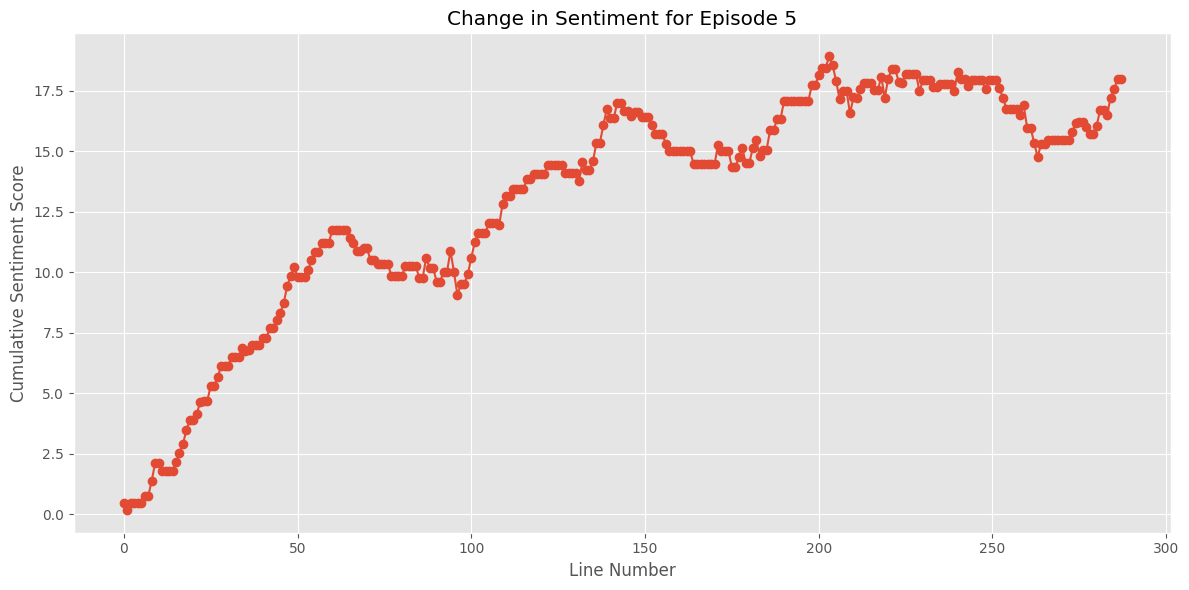

In [39]:
# Select the specific episode you want to analyze (e.g., Episode 5)
episode_to_analyze = 5
selected_episode = series_lines_clean_df.loc[episode_to_analyze, 'episode']

# Apply sentiment analysis and accumulate the sentiment scores for the selected episode
cumulative_sentiment = []
for line in selected_episode.split('\n'):
    line = line.strip()
    if line:
        sentiment_score = calculate_sentiment(line)
        if cumulative_sentiment:
            sentiment_score += cumulative_sentiment[-1]
        cumulative_sentiment.append(sentiment_score)

# Plot the change in sentiment for the selected episode
plt.figure(figsize=(12, 6))
plt.plot(cumulative_sentiment, marker='o')

plt.xlabel('Line Number')
plt.ylabel('Cumulative Sentiment Score')
plt.title(f'Change in Sentiment for Episode {episode_to_analyze}')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib
matplotlib.use('TkAgg')  # Use 'TkAgg' or another appropriate backend

from matplotlib.animation import FuncAnimation


In [ ]:
# Create a figure and axis for the animation
fig, ax = plt.subplots(figsize=(10, 6))

# Function to update the plot for each episode
def update(frame):
    ax.clear()
    episode = series_for_sent.loc[frame, 'episode']
    cumulative_sentiment = []
    for line in episode.split('\n'):
        line = line.strip()
        if line:
            sentiment_score = calculate_sentiment(line)
            if cumulative_sentiment:
                sentiment_score += cumulative_sentiment[-1]
            cumulative_sentiment.append(sentiment_score)
    ax.plot(cumulative_sentiment, marker='o')
    ax.set_xlabel('Line Number')
    ax.set_ylabel('Cumulative Sentiment Score')
    ax.set_title(f'Change in Sentiment for Episode {frame}')
    ax.grid(True)

# Define the range of episodes to display (e.g., the first 5 episodes)
episode_range = range(5)

# Create the animation
animation = FuncAnimation(fig, update, frames=episode_range, repeat=False)

plt.show()

In [ ]:
animation.save('sentiment_animation.mp4', writer='ffmpeg')

MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

In [ ]:
sentiment_scores

In [ ]:
df = pd.DataFrame(sentiment_scores)
df.reset_index(inplace=True)

# Rename the columns for clarity
df.columns = ['episode', 'Spock', 'Kirk', 'McCoy']
df

,episode,Spock,Kirk,McCoy
0,episode,0 -0.6641 1 -0.9900 2 -0.9457 3 -0...,0 0.0000 1 0.9957 2 0.9965 3 0...,0 0.0000 1 0.7874 2 0.9415 3 0...
1,overall,-0.005304,0.224218,0.104833


In [ ]:
sentiment_df

,SPOCK,KIRK,MCCOY
episode,0 -0.6641 1 -0.9900 2 -0.9457 3 -0...,0 0.0000 1 0.9957 2 0.9965 3 0...,0 0.0000 1 0.7874 2 0.9415 3 0...
overall,-0.005304,0.224218,0.104833


In [ ]:
sentiment_df_reset = sentiment_df.reset_index()

# Use the 'melt' function to reshape the DataFrame
melted_sentiment_df = pd.melt(sentiment_df_reset, id_vars='index', var_name='character', value_name='sentiment_score')

# Rename the columns for clarity
melted_sentiment_df.columns = ['episode', 'character', 'sentiment_score']

# Display the reformatted DataFrame
melted_sentiment_df

,episode,character,sentiment_score
0,episode,SPOCK,0 -0.6641 1 -0.9900 2 -0.9457 3 -0...
1,overall,SPOCK,-0.005304
2,episode,KIRK,0 0.0000 1 0.9957 2 0.9965 3 0...
3,overall,KIRK,0.224218
4,episode,MCCOY,0 0.0000 1 0.7874 2 0.9415 3 0...
5,overall,MCCOY,0.104833


In [ ]:
# Reset the index to make 'character' a regular column
sentiment_df_reset = sentiment_df.reset_index()

# Use the 'stack' function to unstack the DataFrame
unstacked_sentiment_df = sentiment_df_reset.set_index('index').stack().reset_index()

# Rename the columns for clarity
unstacked_sentiment_df.columns = ['character', 'episode', 'sentiment_score']

# Display the reformatted DataFrame
unstacked_sentiment_df

,character,episode,sentiment_score
0,episode,SPOCK,0 -0.6641 1 -0.9900 2 -0.9457 3 -0...
1,episode,KIRK,0 0.0000 1 0.9957 2 0.9965 3 0...
2,episode,MCCOY,0 0.0000 1 0.7874 2 0.9415 3 0...
3,overall,SPOCK,-0.005304
4,overall,KIRK,0.224218
5,overall,MCCOY,0.104833


In [ ]:
# Create a new DataFrame where each row represents an episode
episode_sentiment_df = sentiment_df.copy()
episode_sentiment_df.reset_index(inplace=True)

# Melt the DataFrame to have sentiment scores for each episode in separate rows
melted_episode_sentiment_df = episode_sentiment_df.melt(id_vars='index', var_name='character', value_name='sentiment_score')
melted_episode_sentiment_df.columns = ['episode', 'character', 'sentiment_score']

# Display the reformatted DataFrame
melted_episode_sentiment_df

,episode,character,sentiment_score
0,episode,SPOCK,0 -0.6641 1 -0.9900 2 -0.9457 3 -0...
1,overall,SPOCK,-0.005304
2,episode,KIRK,0 0.0000 1 0.9957 2 0.9965 3 0...
3,overall,KIRK,0.224218
4,episode,MCCOY,0 0.0000 1 0.7874 2 0.9415 3 0...
5,overall,MCCOY,0.104833


In [ ]:
# Iterate through episodes and lines grouped by character
for episode_lines_by_character in asdf:
    # Iterate through the characters of interest (Spock, Kirk, McCoy)
    for char in characters_of_interest:
        # Check if the character is in the lines for the current episode
        if char in episode_lines_by_character:
            # Get the lines spoken by the character (already combined into a single string)
            character_lines = episode_lines_by_character[char]
            
            # Perform sentiment analysis on the character's lines
            sentiment = sia.polarity_scores(character_lines)
            
            # Append sentiment scores for the current episode
            sentiment_scores[char]['episode'].append(sentiment['compound'])


AttributeError: 'list' object has no attribute 'encode'

In [ ]:
for episode in data[:5]:  # Print the first 5 episodes as an example
    print(episode)

TypeError: unhashable type: 'slice'

In [ ]:
# Process each line of dialogue
for episode in data:
    for line in episode['lines']:
        character = line['character']
        text = line['text']
        sentiment = sia.polarity_scores(text)
        
        if character == 'Spock':
            spock_sentiment['episode'].append(sentiment['compound'])
        elif character == 'Kirk':
            kirk_sentiment['episode'].append(sentiment['compound'])
        elif character == 'Bones':
            bones_sentiment['episode'].append(sentiment['compound'])

TypeError: string indices must be integers, not 'str'